## Pizza Sales Analysis

### Import reqiured packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import plotly.express as px

### Import data

In [2]:
 data = pd.read_csv("C:\\1work\\Datasets\\Pizza sales dataset\\pizza_sales.csv")

In [3]:
data.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11.38.36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11.57.40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11.57.40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11.57.40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11.57.40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
data.tail()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21.23.10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21.23.10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21.23.10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22.09.54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,31-12-2015,23.02.05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


### Checking Null Values

In [5]:
data.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

### Meta Data

In [6]:
print("Shape of the dataset: ",data.shape)

Shape of the dataset:  (48620, 12)


In [7]:
print("Shape of the dataset Rows: ",data.shape[0])

Shape of the dataset Rows:  48620


In [8]:
print("Shape of the dataset columns: ",data.shape[1])

Shape of the dataset columns:  12


In [9]:
print("Column Names: ",data.columns)

Column Names:  Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


### Data Types in Raw Data

In [11]:
data.dtypes

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

In [12]:
data.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


### KPI's

In [13]:
# Total Revenue
total_revenue = data['total_price'].sum()

# total pizza sold
total_pizza_sold = data['quantity'].sum()

# Total Orders
total_orders = data['order_id'].nunique()

# Average Order Values (AOV)
avg_order_value = total_revenue / total_orders

# Average Pizza's per Order
avg_pizza_per_order = total_pizza_sold / total_orders

print(f"Total Revenue : $ {total_revenue:,.2f}")
print(f"Total Pizzas Sold : {total_pizza_sold:,}")
print(f"Total Orders : {total_orders:,}")
print(f"Average Order Value : $ {avg_order_value:,.2f}")
print(f"Average Pizza's per Order : {avg_pizza_per_order:,.1f}")

Total Revenue : $ 817,860.05
Total Pizzas Sold : 49,574
Total Orders : 21,350
Average Order Value : $ 38.31
Average Pizza's per Order : 2.3


## Charts

#### Incredient Analysis

In [14]:
ingre = (
    data['pizza_ingredients']
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .reset_index()
    .rename(columns = {'pizza_ingredients' : 'Ingredients'})
)

print(ingre.head(15))

          Ingredients  count
0              Garlic  27422
1            Tomatoes  26601
2          Red Onions  19547
3         Red Peppers  16284
4   Mozzarella Cheese  10333
5           Pepperoni  10300
6             Spinach  10012
7           Mushrooms   9624
8             Chicken   8443
9           Capocollo   6572
10       Green Olives   6174
11         Artichokes   5682
12   Jalapeno Peppers   5643
13      Green Peppers   5224
14        Feta Cheese   4748


In [15]:
df_ingre = pd.DataFrame(ingre)
ing = df_ingre.head(10)
ing

,Ingredients,count
0,Garlic,27422
1,Tomatoes,26601
2,Red Onions,19547
3,Red Peppers,16284
4,Mozzarella Cheese,10333
5,Pepperoni,10300
6,Spinach,10012
7,Mushrooms,9624
8,Chicken,8443
9,Capocollo,6572


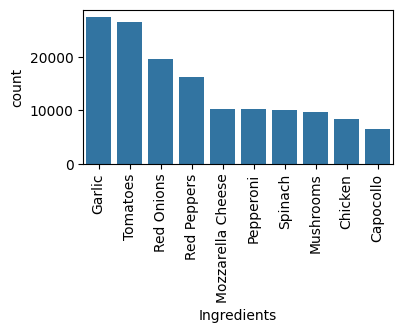

In [16]:
plt.figure(figsize = (4,2))
sns.barplot(x = ing['Ingredients'] , y = ing['count'] )
plt.xticks(rotation = 90)
plt.show()

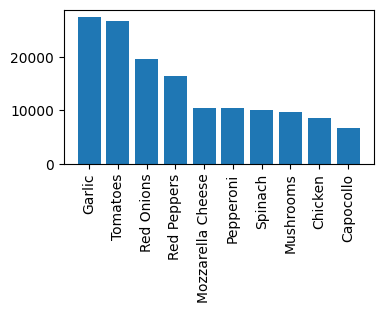

In [17]:
plt.figure(figsize = (4,2))
plt.bar(ing['Ingredients'] , ing['count'] )
plt.xticks(rotation = 90)
plt.show()

### Daily Trend -Total Order

In [18]:
data['order_date'] = pd.to_datetime(data['order_date'], dayfirst = True)

data['day_name'] = data['order_date'].dt.day_name()

weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data['day_name'] = pd.Categorical(data['day_name'], categories = weekday_order , ordered = True)

dd= data.groupby('day_name' , observed = False)['order_id'].nunique()

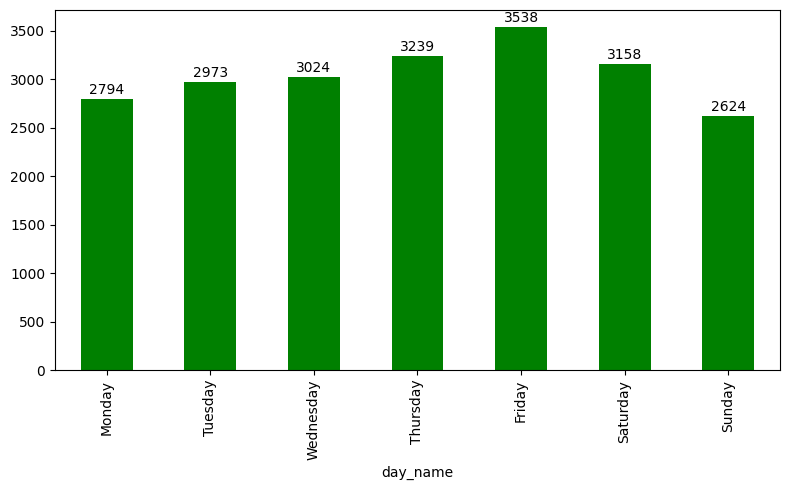

In [19]:
ax = dd.plot(kind = 'bar' , figsize = (8,5) , color = 'green')  

for i , val in enumerate(dd):
    plt.text(i, val + 20 , str(val) , ha = 'center' , va = 'bottom')

plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

### Daily Trend -Total Revenue

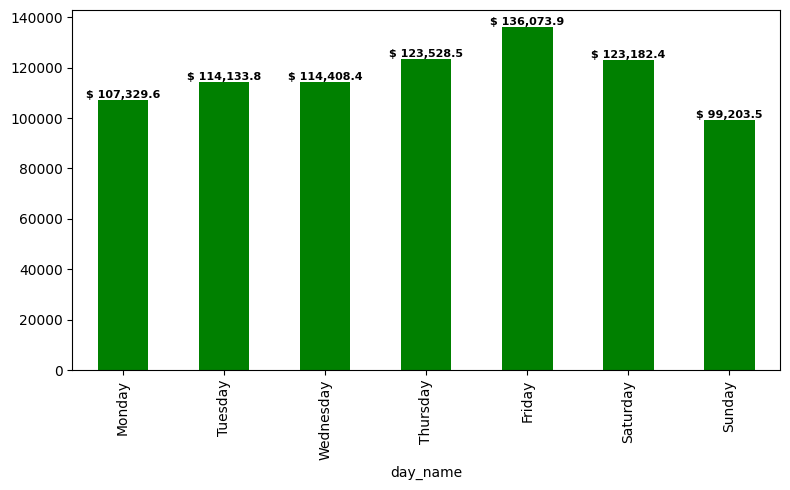

In [20]:
dd2 = data.groupby('day_name' , observed = False)['total_price'].sum()

bx = dd2.plot(kind = 'bar' , figsize = (8,5) , color = 'green')  

for i , val in enumerate(dd2):
    plt.text(i, val + 20 , f'$ {val:,.1f}' , ha = 'center' , va = 'bottom' , fontsize = 8 , fontweight = 'bold')

plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

### Hourly Trend - Total Orders

In [24]:
data['order_time'] = pd.to_datetime(data['order_time'] , format = '%H.%M.%S')

data['order_hour'] = data['order_time'].dt.hour

dd3 = data.groupby('order_hour' , observed = False)['order_id'].nunique()

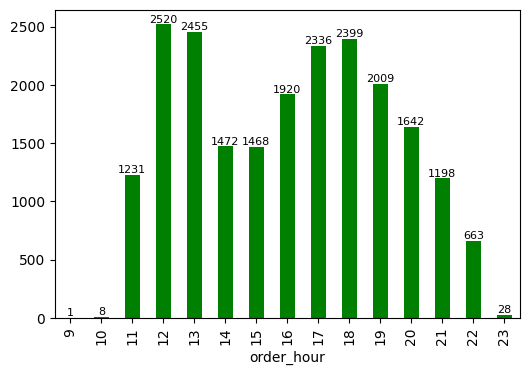

In [31]:
asx= dd3.plot(kind = 'bar' , figsize = (6,4) , color ='green')

for i,val in enumerate(dd3):
    plt.text(i , val , str(val) , ha = 'center' , va = 'bottom' , fontsize = 8)
plt.show()

### Hourly Trend - Total Revenue

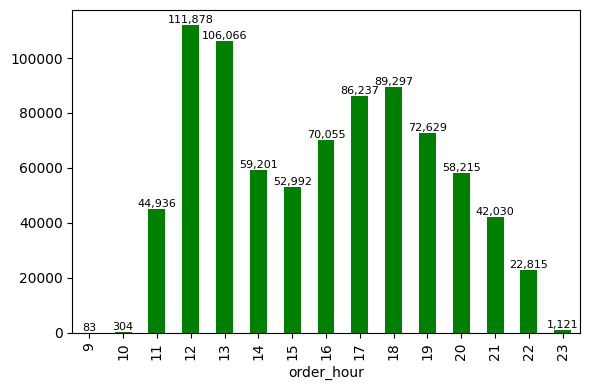

In [39]:
dd3 = data.groupby('order_hour' , observed = False)['total_price'].sum()

asx= dd3.plot(kind = 'bar' , figsize = (6,4) , color ='green')

for i,val in enumerate(dd3):
    plt.text(i , val , f'{val:,.0f}' , ha = 'center' , va = 'bottom' , fontsize = 8 )#, rotation = 90)
plt.tight_layout()
plt.show()

### Monthly Trend - Total Orders

In [64]:
data['order_date'] = pd.to_datetime(data['order_date'], dayfirst = True)

data['month_name'] = data['order_date'].dt.month_name()

month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

data['month_name'] = pd.Categorical(data['month_name'] , categories = month_order , ordered = True)

dd5 = data.groupby('month_name' , observed = False)['order_id'].nunique() 

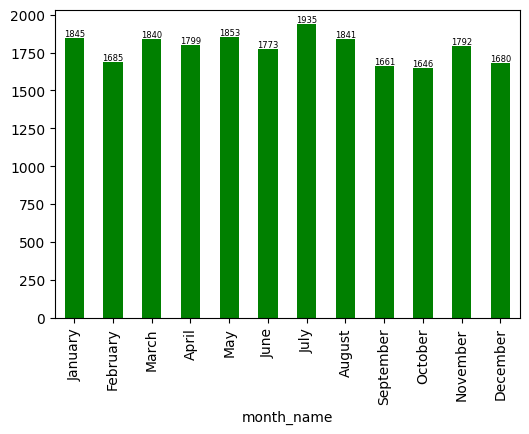

In [68]:
axb = dd5.plot(kind = 'bar', figsize = (6,4) , color = 'green')

for i,val in enumerate(dd5):
    plt.text(i,val,str(val), ha = 'center' , va = 'bottom' , fontsize = 6)
plt.show()

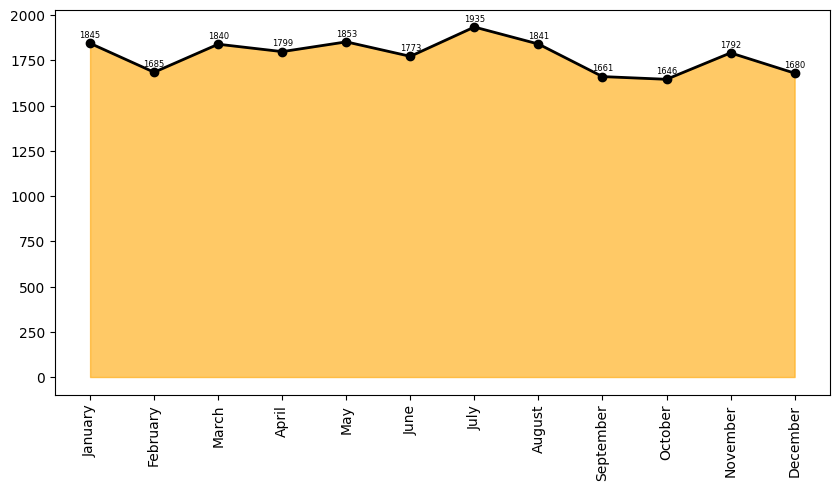

In [81]:
plt.figure (figsize = (10,5))
plt.fill_between(dd5.index , dd5.values , color = 'orange' , alpha = 0.6)
plt.plot(dd5.index , dd5.values , color = 'black', linewidth = 2, marker = 'o')

for i,val in enumerate(dd5):
    plt.text(i,val +20 ,str(val), ha = 'center' , va = 'bottom' , fontsize = 6)

plt.xticks(rotation = 90)    
plt.show()

### Monthly Trend - Total Revenue

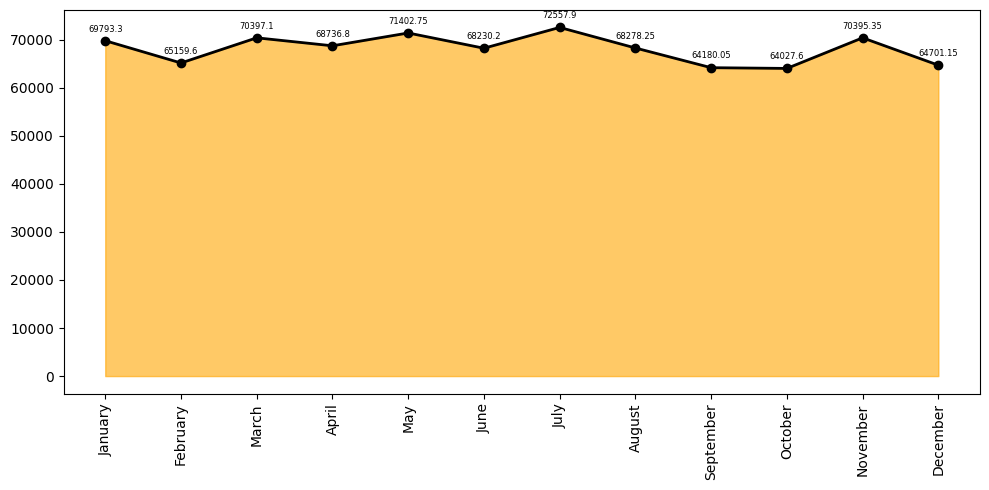

In [94]:
dd6 = data.groupby('month_name' , observed = False)['total_price'].sum()

plt.figure (figsize = (10,5))
plt.fill_between(dd6.index , dd6.values , color = 'orange' , alpha = 0.6)
plt.plot(dd6.index , dd6.values , color = 'black', linewidth = 2, marker = 'o')

for i,val in enumerate(dd6):
    plt.text(i,val + 1500,str(val), ha = 'center' , va = 'bottom' , fontsize = 6)

plt.xticks(rotation = 90) 
plt.tight_layout()
plt.show()

### % Sales by Category

In [96]:
cat_sales = data.groupby('pizza_category')['total_price'].sum()

cat_sales_per = cat_sales / cat_sales.sum() * 100

cat_sales_per

pizza_category
Chicken    23.955138
Classic    26.905960
Supreme    25.456311
Veggie     23.682591
Name: total_price, dtype: float64

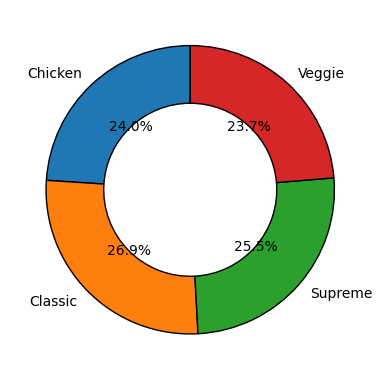

In [106]:
plt.figure(figsize=(4,4))
plt.pie(cat_sales_per, labels = cat_sales_per.index , autopct = '%1.1f%%'
       , startangle=90 , wedgeprops={'edgecolor':'black', 'width':0.4})

plt.tight_layout()
plt.show()

### % Sales by Pizza Size and Category

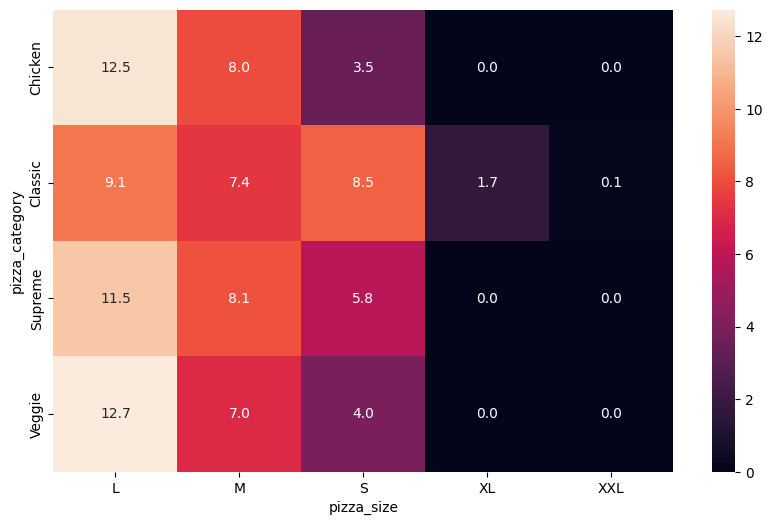

In [116]:
sales_pivot = data.pivot_table(
    index = 'pizza_category',
    columns = 'pizza_size',
    values = 'total_price', 
    aggfunc = 'sum',
    fill_value = 0
)

sales_pct = sales_pivot / sales_pivot.sum().sum() * 100

plt.figure(figsize = (10,6))
sns.heatmap(sales_pct ,annot = True , fmt = '.1f')
plt.show()

### Total Pizza Sold by Category

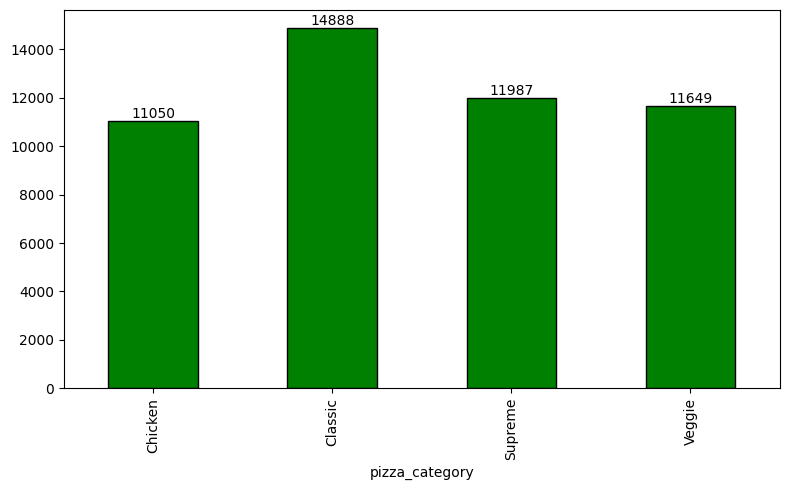

In [158]:
pizza_sold = data.groupby('pizza_category')['quantity'].sum()

ax = pizza_sold.plot(kind = 'bar' , figsize = (8,5) , color = 'green',edgecolor = 'black')

for i,val in enumerate(pizza_sold):
    plt.text(i,val, str(val) , ha = 'center', va = 'bottom')

plt.tight_layout()
plt.show()

### 5 Top Selling Pizza - Total Qty

In [156]:
top5_pizza_qty = data.groupby('pizza_name')['quantity'].sum()

top5_qty = top5_pizza_qty.sort_values(ascending = False).head(5)

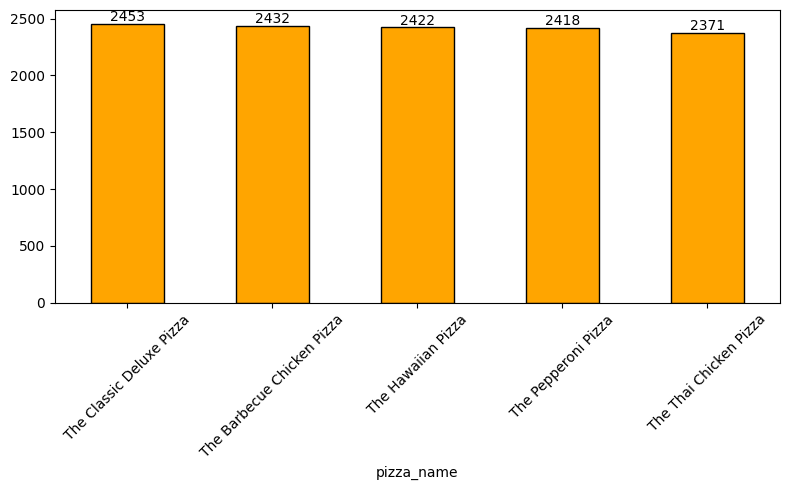

In [157]:
ax = top5_qty.plot(kind = 'bar' , figsize = (8,5) , color = 'orange',edgecolor = 'black')

for i,val in enumerate(top5_qty):
    plt.text(i,val, str(val) , ha = 'center', va = 'bottom')

plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### 5 Top Selling Pizza - Total Orders

In [130]:
top5_pizza_ord = data.groupby('pizza_name')['order_id'].nunique()

top5_ord = top5_pizza_ord.sort_values(ascending = False).head(5)
top5_ord

pizza_name
The Classic Deluxe Pizza      2329
The Hawaiian Pizza            2280
The Pepperoni Pizza           2278
The Barbecue Chicken Pizza    2273
The Thai Chicken Pizza        2225
Name: order_id, dtype: int64

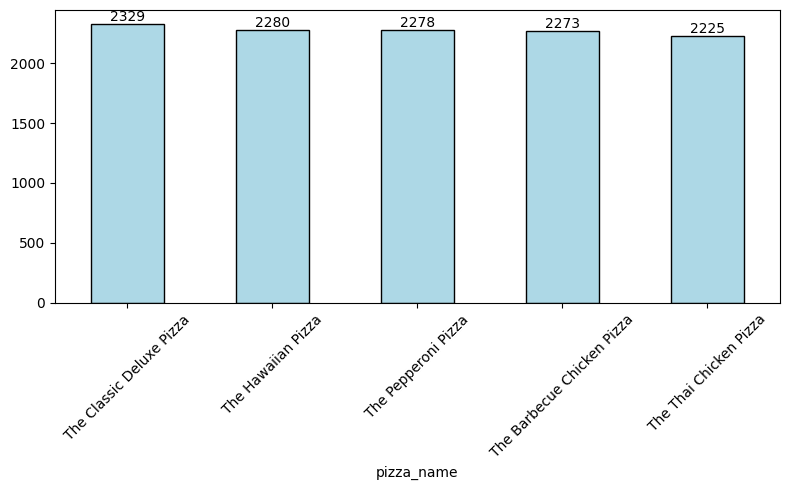

In [154]:
ax = top5_ord.plot(kind = 'bar' , figsize = (8,5) , color = 'lightblue',edgecolor = 'black')

for i,val in enumerate(top5_ord):
    plt.text(i,val, str(val) , ha = 'center', va = 'bottom')

plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### 5 Top Selling Pizza - Total Sales

In [133]:
top5_pizza_sal = data.groupby('pizza_name')['total_price'].sum()

top5_sal = top5_pizza_sal.sort_values(ascending = False).head(5)
top5_sal

pizza_name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
Name: total_price, dtype: float64

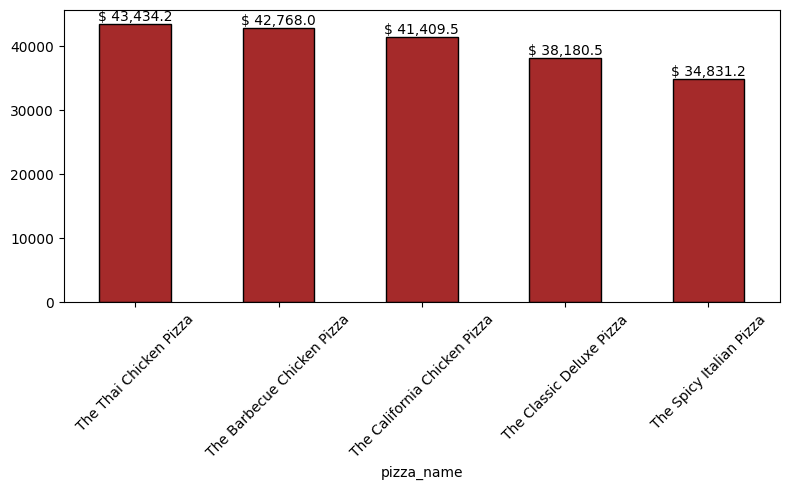

In [152]:
ax = top5_sal.plot(kind = 'bar' , figsize = (8,5) , color = 'brown', edgecolor = 'black')

for i,val in enumerate(top5_sal):
    plt.text(i,val, f'$ {val:,.1f}' , ha = 'center', va = 'bottom')

plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### 5 Bottom Selling Pizza - Total Sales

In [141]:
bot5_pizza_sal = data.groupby('pizza_name')['total_price'].sum()

bot5_sal = bot5_pizza_sal.sort_values(ascending = True).head(5)
bot5_sal

pizza_name
The Brie Carre Pizza         11588.50
The Green Garden Pizza       13955.75
The Spinach Supreme Pizza    15277.75
The Mediterranean Pizza      15360.50
The Spinach Pesto Pizza      15596.00
Name: total_price, dtype: float64

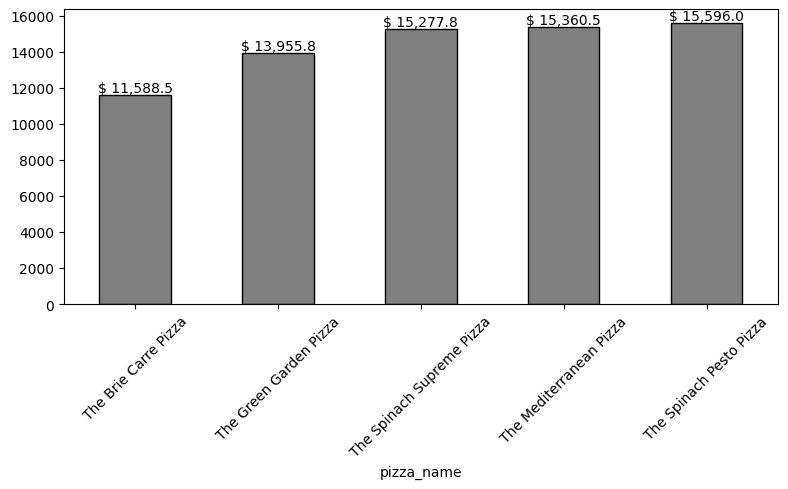

In [147]:
ax = bot5_sal.plot(kind = 'bar' , figsize = (8,5) , color = 'grey' ,edgecolor = 'black')

for i,val in enumerate(bot5_sal):
    plt.text(i,val, f'$ {val:,.1f}' , ha = 'center', va = 'bottom')

plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()